In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#X=48
X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#X = prosody_data.iloc[:, 4:].values



In [3]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy_linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [4]:
df_x =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause']]

df_x['mahala'] = mahalanobis(x=df_x, data=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause']])
#df_x =X

#df_x['mahala'] = mahalanobis(x=X, data=X)
X=df_x

<ipython-input-4-8fe223a3a9a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['mahala'] = mahalanobis(x=df_x, data=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks'

In [5]:
imDict={}
print(len(prosody_data))
dim=(7,7)
num_classes = 3
x_imageSet=np.empty((len(prosody_data),dim[0],dim[1]))

y_Set=np.empty((len(prosody_data),1))



680


In [15]:
for index, row in X.iterrows():
    print(row)
    mat = np.reshape(row.to_numpy(),(dim[0],dim[1]))
    x_imageSet[index]=mat
    y_Set[index] = y[index]
    imDict[index]=(x_imageSet[index],y_Set[index])
#imDict
   


duration            5.195213e+01
energy              1.533130e-02
power               2.951040e-04
min_pitch           7.523266e+01
max_pitch           3.966356e+02
mean_pitch          1.279892e+02
pitch_sd            2.782153e+01
pitch_abs           2.176287e+02
pitch_quant         1.196904e+02
pitchUvsVRatio      7.738299e-01
Time:8              5.192606e+01
iDifference         3.969125e+00
diffPitchMaxMin     3.214030e+02
diffPitchMaxMean    2.686464e+02
diffPitchMaxMode    2.769452e+02
intensityMin        3.514692e+01
intensityMax        7.286781e+01
intensityMean       5.868428e+01
intensitySD         7.887426e+00
intensityQuant      5.427303e+01
diffIntMaxMin       3.772088e+01
diffIntMaxMean      1.418352e+01
diffIntMaxMode      1.859478e+01
avgVal1             6.264717e+02
avgVal2             1.812871e+03
avgVal3             2.726755e+03
avgBand1            3.695138e+02
avgBand2            4.605546e+02
avgBand3            4.905475e+02
fmean1              6.264717e+02
fmean2    

Name: 142, dtype: float64
duration            3.993088e+01
energy              9.972506e-03
power               2.497440e-04
min_pitch           7.297086e+01
max_pitch           3.264602e+02
mean_pitch          1.877019e+02
pitch_sd            5.576561e+01
pitch_abs           3.092547e+02
pitch_quant         1.890723e+02
pitchUvsVRatio      1.036753e+00
Time:8              3.990294e+01
iDifference         1.644292e+02
diffPitchMaxMin     2.534893e+02
diffPitchMaxMean    1.387583e+02
diffPitchMaxMode    1.373879e+02
intensityMin        3.406035e+01
intensityMax        7.126847e+01
intensityMean       5.796122e+01
intensitySD         8.481691e+00
intensityQuant      5.395715e+01
diffIntMaxMin       3.720812e+01
diffIntMaxMean      1.330725e+01
diffIntMaxMode      1.731132e+01
avgVal1             6.436544e+02
avgVal2             1.859951e+03
avgVal3             3.001829e+03
avgBand1            4.375382e+02
avgBand2            4.859329e+02
avgBand3            5.977191e+02
fmean1           

Name: 271, dtype: float64
duration            3.184944e+01
energy              3.259508e-03
power               1.023410e-04
min_pitch           7.502208e+01
max_pitch           2.834748e+02
mean_pitch          2.100773e+02
pitch_sd            2.955482e+01
pitch_abs           2.816965e+02
pitch_quant         2.113377e+02
pitchUvsVRatio      5.786600e-01
Time:8              3.182159e+01
iDifference         1.654847e+02
diffPitchMaxMin     2.084527e+02
diffPitchMaxMean    7.339747e+01
diffPitchMaxMode    7.213708e+01
intensityMin        3.409380e+01
intensityMax        7.184187e+01
intensityMean       5.408770e+01
intensitySD         6.984611e+00
intensityQuant      5.031988e+01
diffIntMaxMin       3.774807e+01
diffIntMaxMean      1.775417e+01
diffIntMaxMode      2.152198e+01
avgVal1             6.256757e+02
avgVal2             1.801263e+03
avgVal3             2.880696e+03
avgBand1            4.587282e+02
avgBand2            5.688859e+02
avgBand3            6.684384e+02
fmean1           

Name: 388, dtype: float64
duration            1.758063e+01
energy              5.221634e-03
power               2.970110e-04
min_pitch           8.448649e+01
max_pitch           3.703412e+02
mean_pitch          2.006289e+02
pitch_sd            3.182187e+01
pitch_abs           3.696303e+02
pitch_quant         1.976976e+02
pitchUvsVRatio      3.884494e-01
Time:8              1.755281e+01
iDifference         1.349485e+02
diffPitchMaxMin     2.858547e+02
diffPitchMaxMean    1.697123e+02
diffPitchMaxMode    1.726436e+02
intensityMin        3.630289e+01
intensityMax        7.129482e+01
intensityMean       5.871623e+01
intensitySD         7.447234e+00
intensityQuant      5.450329e+01
diffIntMaxMin       3.499193e+01
diffIntMaxMean      1.257859e+01
diffIntMaxMode      1.679153e+01
avgVal1             5.948246e+02
avgVal2             1.689812e+03
avgVal3             2.669176e+03
avgBand1            3.266370e+02
avgBand2            5.365291e+02
avgBand3            6.442247e+02
fmean1           

Name: 516, dtype: float64
duration            1.367096e+02
energy              8.830415e-02
power               6.459250e-04
min_pitch           6.827294e+01
max_pitch           3.993516e+02
mean_pitch          1.230380e+02
pitch_sd            3.135322e+01
pitch_abs           1.627657e+02
pitch_quant         1.158220e+02
pitchUvsVRatio      9.195225e-01
Time:8              1.366829e+02
iDifference         1.404667e+02
diffPitchMaxMin     3.310787e+02
diffPitchMaxMean    2.763136e+02
diffPitchMaxMode    2.835296e+02
intensityMin        3.524825e+01
intensityMax        7.932789e+01
intensityMean       6.208355e+01
intensitySD         1.018376e+01
intensityQuant      5.569378e+01
diffIntMaxMin       4.407964e+01
diffIntMaxMean      1.724434e+01
diffIntMaxMode      2.363411e+01
avgVal1             6.432990e+02
avgVal2             1.800539e+03
avgVal3             2.831179e+03
avgBand1            4.427396e+02
avgBand2            5.582338e+02
avgBand3            6.401159e+02
fmean1           

Name: 642, dtype: float64
duration               110.327833
energy                   0.032598
power                    0.000295
min_pitch               75.544994
max_pitch              418.992646
mean_pitch             221.783854
pitch_sd                43.417504
pitch_abs              280.727711
pitch_quant            215.123395
pitchUvsVRatio           0.832973
Time:8                 110.301417
iDifference             66.613547
diffPitchMaxMin        343.447652
diffPitchMaxMean       197.208792
diffPitchMaxMode       203.869251
intensityMin            34.913752
intensityMax            75.516064
intensityMean           58.687397
intensitySD              8.856011
intensityQuant          51.536258
diffIntMaxMin           40.602312
diffIntMaxMean          16.828667
diffIntMaxMode          23.979806
avgVal1                657.079918
avgVal2               1862.298001
avgVal3               2915.136239
avgBand1               436.719269
avgBand2               628.084831
avgBand3              

Text(0.5, 1.0, 'Class : [1.]')

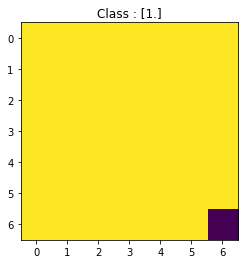

In [7]:
plt.imshow(imDict[0][0])
plt.title("Class : {}".format(y_Set[0]))

In [9]:
def load_data(imDict,train, test):
    train_len = len(train)
    test_len =  len(test)
    x_trainImSet=np.empty((train_len,dim[0],dim[1]))
    x_testImSet=np.empty((test_len,dim[0],dim[1]))
    y_trainSet=np.zeros(train_len)
    y_testSet=np.zeros(test_len)
    for trnPi in range(train_len):
        (x_trainImSet[trnPi],y_trainSet[trnPi])=train[trnPi]
    
    for testPi in range(test_len):
        (x_testImSet[testPi],y_testSet[testPi])=test[testPi]
    
    x_trainImSet= x_trainImSet.astype('float32')
    x_testImSet= x_testImSet.astype('float32')
   
    
    # convert class vectors to matrices as binary
    
    y_trainSet= tensorflow.keras.utils.to_categorical(y_trainSet, num_classes)
    y_testSet= tensorflow.keras.utils.to_categorical(y_testSet, num_classes)
    
   
    return (x_trainImSet,y_trainSet), (x_testImSet,y_testSet)

In [10]:
batch_size = 5
epochs = 10



import datetime
start = datetime.datetime.now()

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(dim[0],dim[1],1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 32)          320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         7

In [11]:
def CreateModel( X_train, X_test, y_train, y_test):
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    X = X_train
    y = y_21_train
    (x_trainImSet,y_trainSet), (x_testImSet,y_testSet)=load_data(imDict,X, y_test)
    
    X_train= X_train.reshape(len(X_train),dim[0],dim[1],1)
    X_test=X_test.reshape(len(X_test),dim[0],dim[1],1)
    #Classifier 
    fashion_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, y_test))
    scores = fashion_model.evaluate(X_test, y_test,batch_size=batch_size, verbose=0)
    
    
    
    y_21_predict=clf.predict(X_test)
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train
    y = y_10_train
    
    #Classifier 
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    clf.score(X, y)
    y_10_predict = clf.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    #target_names = ['class 0', 'class 1', 'class 2']
    #print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)

    return acc 


In [12]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=12)
cvscores =[]

for train_index, test_index in skf.split(X, y):

    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    scores = CreateModel( X_train, X_test, y_train, y_test)
    
    cvscores.append(scores)
print(cvscores ) 
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  19  20
  21  22  23  24  25  26  27  28  29  30  31  34  35  39  42  43  44  45
  46  47  49  50  51  53  54  55  56  57  58  59  60  61  64  66  67  68
  70  71  72  74  75  76  77  78  80  81  82  86  90  91  92  93  94  96
  97  98 100 101 102 103 104 106 107 108 110 114 115 116 117 118 120 121
 123 124 125 127 128 130 131 133 134 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 152 153 154 155 156 157 158 159 160 161 162 164 165
 166 167 169 170 171 172 173 174 175 176 177 178 179 180 183 184 185 186
 187 188 189 190 191 193 196 197 198 199 201 203 205 206 209 210 211 213
 214 215 216 217 218 219 220 221 223 224 225 227 228 229 230 232 233 234
 235 236 238 240 241 242 243 245 246 247 248 250 252 253 254 256 257 258
 259 260 262 263 264 265 269 271 272 273 274 276 277 278 280 281 282 283
 284 285 286 287 288 289 290 291 294 297 298 299 300 301 302 303 305 306
 307 308 309 310 311 312 313 314 315 316 318

KeyError: 0